# Crime Rate Forecaster:

## What do we consider as a crime?

<i>For the remainder of the context, we will use wikipedia as our main source: (en.wikipedia.org/wiki/Crime)</i>

In ordinary language, a crime is an unlawful act punishable by a state or other authority. From a general standpoint, the term 'crime' does not have any simple or universally accepted definition. A proposed definition for 'crime' is one that is deemed as an act which is harmful to not only to some individual but also to a community, society, or the state. 

The main 'crime' we investigate in our model and report is <b> burglary </b>. Burglary is defined as the following: breaking & entering or housebreaking. These are considered a 'property' crime involving the illegal entry into a building or other area without permission. 

With a direct quote from the Australian Bureau of Statistics (ABS): 'The proportion of households that were broken into rose from 1.8% in 2022-23 to 2.1% in 2023-2024'. Ultimately, an increase of 32,000 extra households within 1-2 years. 

Some further information shows that 75% had reported the incident to the police with 25% not being reported. We can use this information to evaluate the potential of utilising a police notification system when the alarm is set. 

Additionally, 21% of homes were broken into multiple times, indicating a lack of security within the home to deter intruders. 

## The goal: 

The goal of this notebook and report is to identify the reason why our product needs to be developed. How would this actually prevent the crime rate from increasing and train a machine learning model to predict the crime rate over the next 10 years. 

## Task 1: Setup

1. Firstly, we will identify the number of offenders between 2008-2024 in Australia in total. This includes burglary, but more of a general, overaching view:

2. Install the important libraries and import what we need.

In [3]:
#%pip install openpyxl
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn 
#%pip install scikit-learn
#%pip install -U statsmodels==0.14.4 scipy==1.14.1

In [4]:
import pandas as pd 
import openpyxl
import pytz
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
number_of_offenders_data = pd.read_excel('Offenders, 2008-09 to 2023-24.xlsx', sheet_name='Sheet1', header=1, index_col=0) #number of offenders data

harmful_offenders_data = pd.read_excel('Offender rate(a), principal offence of acts intended to cause injury.xlsx', sheet_name='Sheet1', header=1, index_col=0) #number of offenders with intent of harm

In [53]:
number_of_offenders_data['Offender number'] = pd.to_numeric(number_of_offenders_data['Offender number'], errors="coerce")

offenders_data = number_of_offenders_data.iloc[:16]

offenders_data

,Offender number
2008–09,375593.0
2009–10,393263.0
2010–11,387841.0
2011–12,382098.0
2012–13,397663.0
2013–14,409896.0
2014–15,413775.0
2015–16,418352.0
2016–17,413894.0
2017–18,406767.0


In [62]:
harmful_data = harmful_offenders_data.iloc[:16]

harmful_data

,Offender rate
2008–09,384.9
2009–10,379.0
2010–11,364.9
2011–12,348.6
2012–13,352.3
2013–14,352.0
2014–15,353.5
2015–16,365.1
2016–17,369.4
2017–18,362.7


## Task 2: Exploratory Data Analysis (EDA):

#### 1. Offender Count (Australia) from 2008-2024:

Text(0.5, 1.0, 'Australian Offender Count Between 2008-2024:')

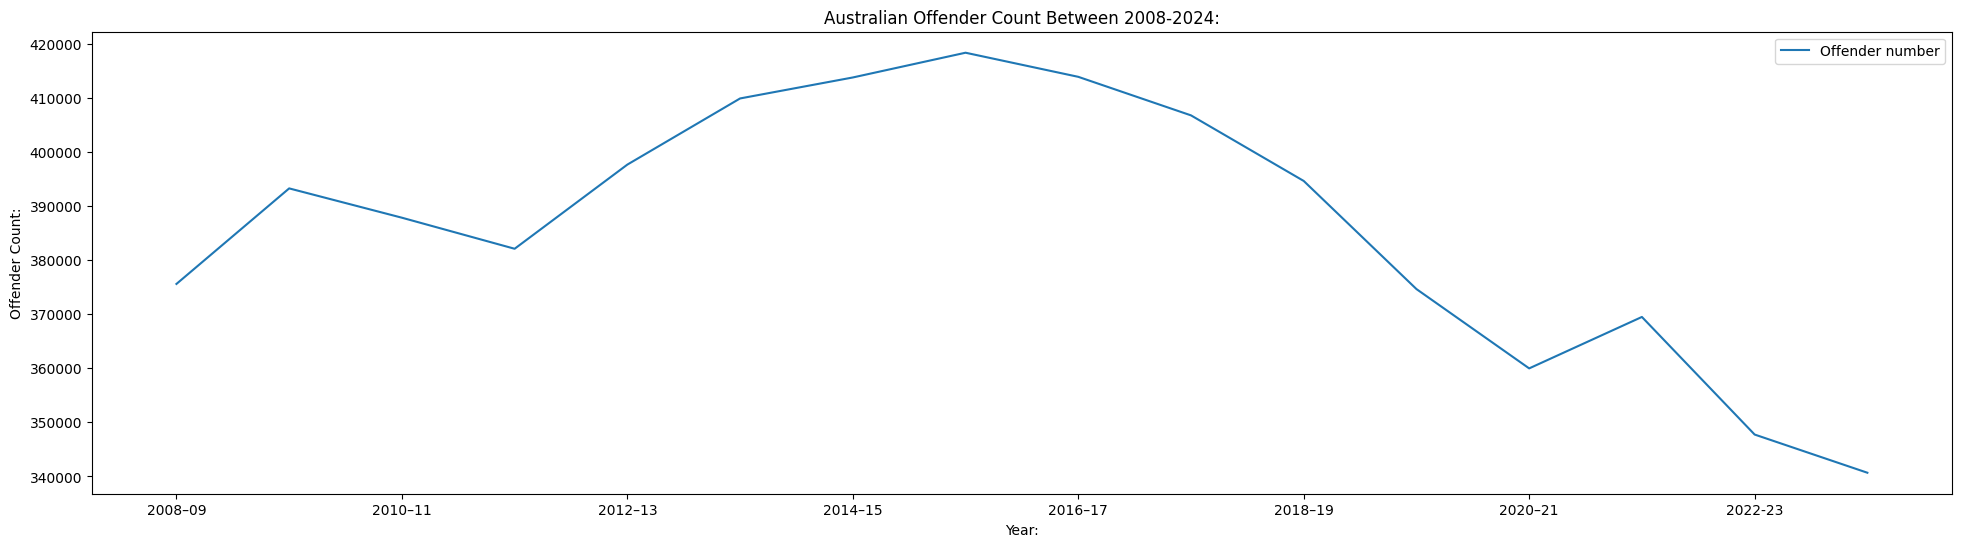

In [64]:
offenders_data.plot(figsize=(24,6))
plt.xlabel("Year:")
plt.ylabel("Offender Count:")
plt.title("Australian Offender Count Between 2008-2024:")


Text(0.5, 0, 'Number of Offenders:')

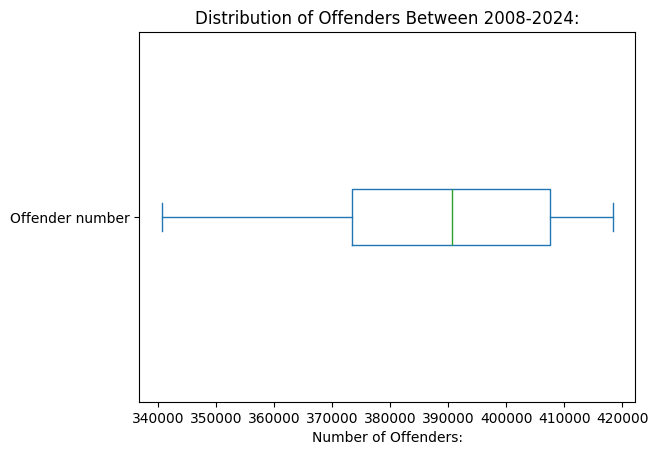

In [ ]:
offenders_data.plot.box(vert=False, title="Distribution of Offenders Between 2008-2024:")
plt.xlabel("Number of Offenders:")

#### 2. Rate of offenders with intent to harm:

As a quick background, the units is slightly different in the way that we track the rate per 100,000 people aged 10 years and over. Indicating a value of 300/400, would mean 300 or 400 people out of 100,000. 

Text(0, 0.5, 'Rate per 100,000 persons aged 10 years and over: ')

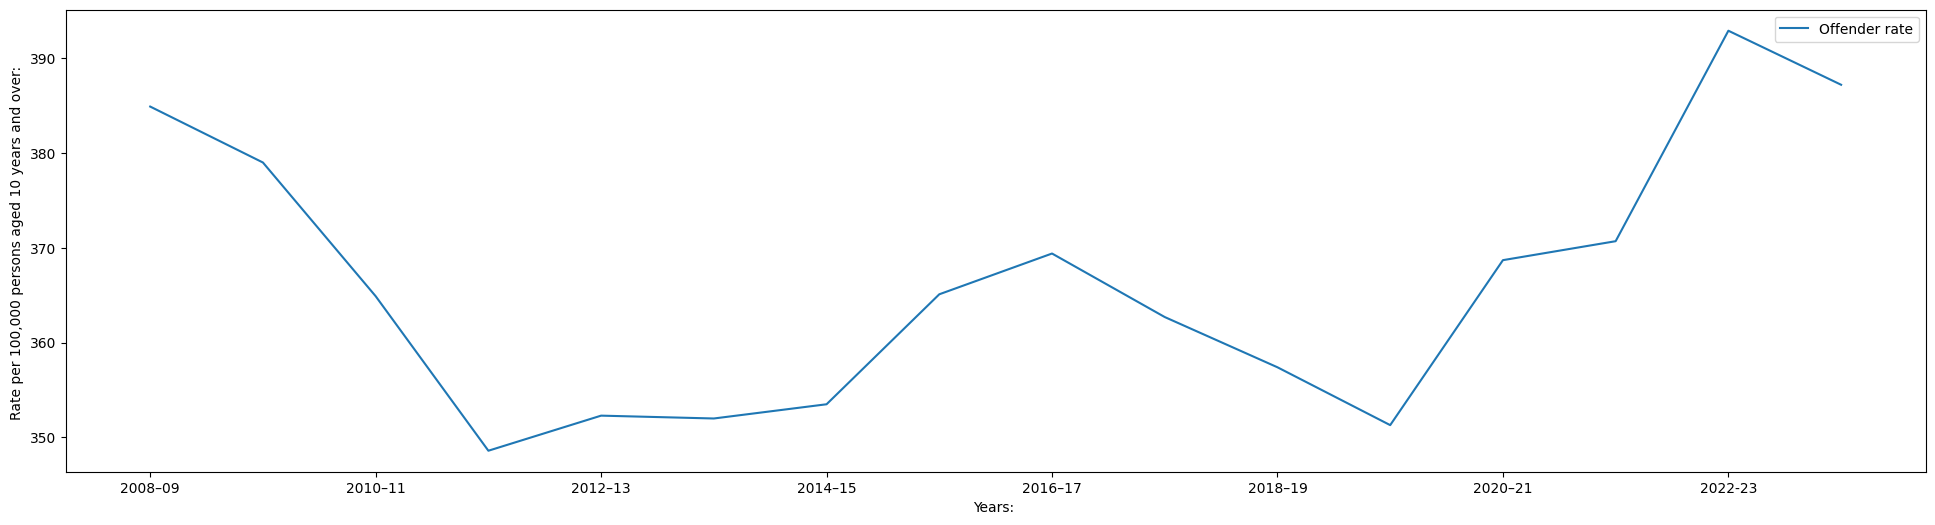

In [73]:
harmful_data.plot(figsize=(24,6))
plt.xlabel("Years: ")
plt.ylabel("Rate per 100,000 persons aged 10 years and over: ")


Text(0.5, 0, 'Rate per 100,000 persons aged 10 years and over: ')

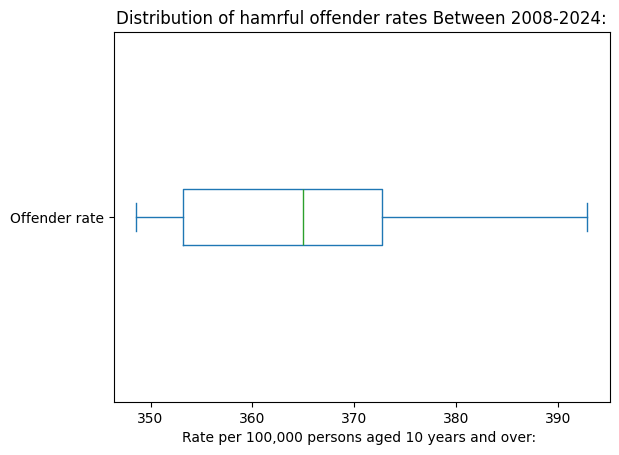

In [75]:
harmful_data.plot.box(vert=False, title="Distribution of hamrful offender rates Between 2008-2024:")
plt.xlabel("Rate per 100,000 persons aged 10 years and over: ")

#### Overall Analysis of Data: 

In [82]:
offenders_data = (pd.DataFrame(offenders_data) / 1000)

harmful_data = pd.DataFrame(harmful_data)


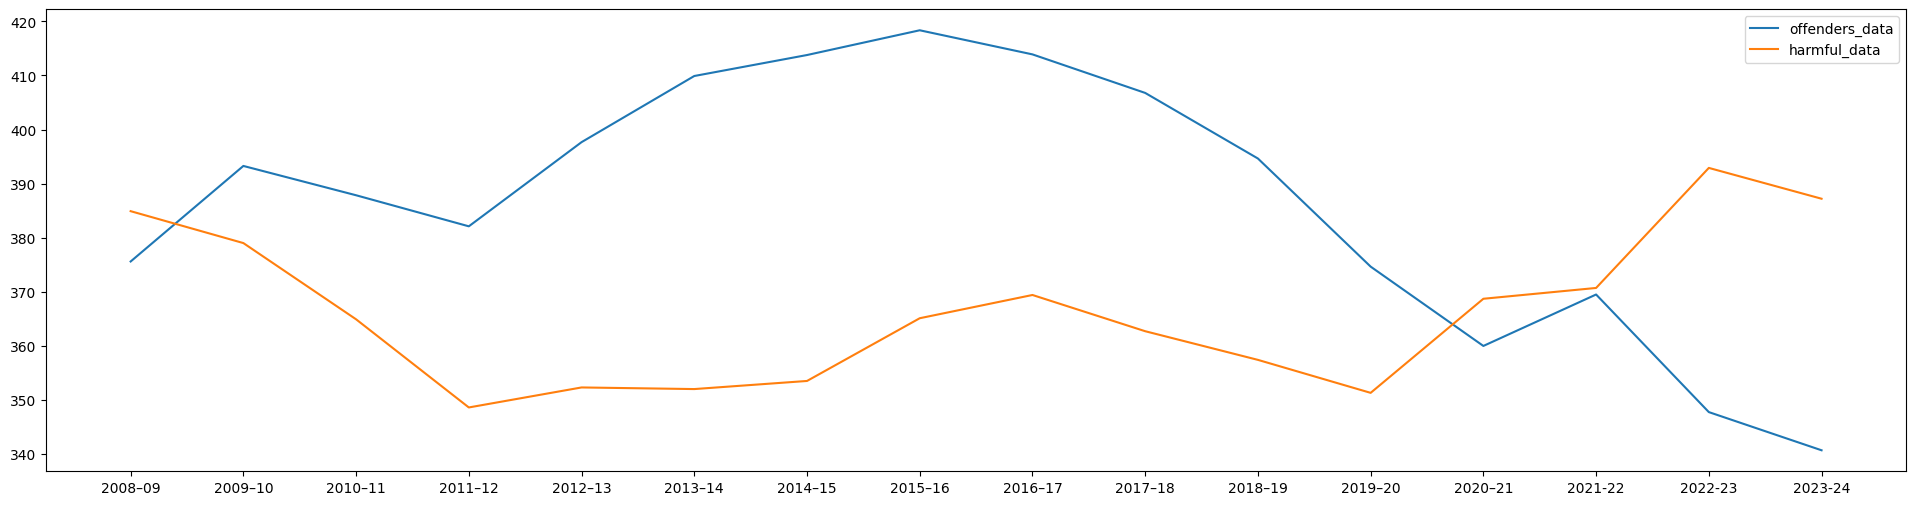

In [92]:

plt.figure(figsize=(24,6))
plt.plot(offenders_data, label='offenders_data')
plt.plot(harmful_data, label='harmful_data')
plt.legend()
